# **Clustering Data - TRetail Company**

In this section of our analysis, we attempt to cluster the data based on their features. We utilize some predefined features provided to us, as well as others that we calculate from the original dataset ('%Valor_dia', '%Itens_dia', 'Nº Horas Aberto', '%Valor_dia_semana', '%Valor_dia_fds').


We initially employ K-Means Clustering, and subsequently explore Spectral Clustering and DBSCAN. However, we find that these latter two approaches are overly complex for our dataset.

Consequently, we opt to continue our analysis using the data clustered into 4 clusters with the K-Means Model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import
import pandas as pd
import numpy as np
import math
import datetime
from datetime import date
from datetime import timedelta
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
#Import tabela  'retail resumida'
retail_complete_df = pd.read_excel("/content/drive/MyDrive/Ficheiros Finais/Clustering - final/Cluster_data.xlsx")

retail_complete_df.head()

,LOJA,Tipo Loja,#_Valor_dia,#_Itens_dia,SKUS,#_%_Valor_dias_semana,#_%_Valor_dias_fds,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,#_Avg_price_item_dias_fds,...,#_Media_pond_quin,#_Media_pond_sex,#_Media_pond_sab,#_Media_pond_dom,%_Caixas_tradicionais,%_Self_Check_out,PRODUTIVIDADE/HORA,N_COLABORADORES,Nº Horas Aberto,#_Mediana_loja
0,Caldas da Rainha,1. Loja Mini,12620.49,5767.5,2760,0.3218,0.6782,11958.99,14286.06,2.23,...,-0.0280,-0.0184,-0.0209,-0.0241,0.5000,0.5000,136,7,13.0,12118.56
1,Campera,1. Loja Mini,17178.43,7043.1,3225,0.3597,0.6403,15373.27,21718.96,2.49,...,-0.0279,-0.0305,-0.0196,-0.0228,0.7333,0.2667,200,12,16.0,15576.91
2,Canidelo,1. Loja Mini,20187.40,8222.9,3145,0.3174,0.6826,19269.17,22492.35,2.52,...,-0.0319,-0.0266,-0.0207,-0.0220,1.0000,0.0000,147,13,14.0,18717.85
3,Faro Mercado,1. Loja Mini,21786.80,10453.5,3386,0.2961,0.7039,21440.04,22658.11,2.15,...,-0.0209,-0.0063,-0.0333,-0.0221,0.2727,0.7273,222,11,13.8,21192.23
4,Guarda,1. Loja Mini,16847.69,8021.0,3215,0.2808,0.7192,16934.55,16629.22,2.14,...,-0.0322,-0.0190,-0.0254,-0.0205,0.8333,0.1667,186,11,14.5,16394.50


In [ ]:
retail_complete_df.isnull().sum()

LOJA                                 0
Tipo Loja                            0
#_Valor_dia                          0
#_Itens_dia                          0
SKUS                                 0
#_%_Valor_dias_semana                0
#_%_Valor_dias_fds                   0
#_Valor_medio_dia_semana             0
#_Valor_medio_dia_fds                0
#_Avg_price_item_dias_fds            0
#_Avg_price_item_dias_semana         0
#_Avg_price_itens                    0
#_Valor_por_colab_por_hora_aberta    0
#_Media_pond_seg                     0
#_Media_pond_ter                     0
#_Media_pond_qua                     0
#_Media_pond_quin                    0
#_Media_pond_sex                     0
#_Media_pond_sab                     0
#_Media_pond_dom                     0
%_Caixas_tradicionais                0
%_Self_Check_out                     0
PRODUTIVIDADE/HORA                   0
N_COLABORADORES                      0
Nº Horas Aberto                      0
#_Mediana_loja           



---





---



## 1. Pre-processing Data

In [ ]:
# Using only features selected after
retail_complete_df_1 = retail_complete_df[['#_Valor_dia', '#_Itens_dia', '#_Valor_medio_dia_semana', '#_Valor_medio_dia_fds', 'SKUS', 'N_COLABORADORES',  '#_Mediana_loja']]
retail_complete_df_1

,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja
0,12620.49,5767.5,11958.99,14286.06,2760,7,12118.56
1,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91
2,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85
3,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23
4,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50
...,...,...,...,...,...,...,...
65,113897.08,38496.2,104819.79,136787.65,38937,53,103981.80
66,110872.84,33655.8,99867.97,138497.33,40519,58,100869.55
67,107203.53,34221.1,97409.54,131813.43,40050,58,96580.23
68,173112.48,54436.8,163883.37,196302.97,44281,71,164135.18


In [ ]:
print("In the cluster dataset of the retail dataset, we have {} stores and {} features.".format(retail_complete_df_1.shape[0], retail_complete_df_1.shape[1]))

In the cluster dataset of the tlantic dataset, we have 70 stores and 7 features.


## 1.1. Standardization with z-score

In [ ]:
#Normalizar os dados com Standardização (z-score)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_retail_df = scaler.fit_transform(retail_complete_df_1)

normalized_retail_df = pd.DataFrame(normalized_retail_df, columns=retail_complete_df_1.iloc[:,:].columns)

normalized_retail_df

,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja
0,-0.556368,-0.532048,-0.558616,-0.550245,-0.616295,-0.931642,-0.553148
1,-0.475395,-0.456704,-0.493274,-0.438725,-0.581647,-0.678675,-0.487171
2,-0.421939,-0.387018,-0.418714,-0.427121,-0.587608,-0.628082,-0.427250
3,-0.393526,-0.255266,-0.377168,-0.424634,-0.569650,-0.729268,-0.380046
4,-0.481271,-0.398944,-0.463394,-0.515089,-0.582392,-0.729268,-0.471574
...,...,...,...,...,...,...,...
65,1.242848,1.401096,1.218552,1.287720,2.079373,1.395656,1.199364
66,1.189121,1.115194,1.123784,1.313371,2.197253,1.648624,1.139990
67,1.123935,1.148584,1.076735,1.213088,2.162307,1.648624,1.058161
68,2.294832,2.342639,2.348910,2.180663,2.477572,2.306339,2.346933




---





---



## 2. Clustering with K-Means

### 2.1. Finding the optimal number of clusters using the elbow method (inertias)

In [ ]:
inertias = []
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(normalized_retail_df)

    inertias.append(kmeanModel.inertia_)

    mapping2[k] = kmeanModel.inertia_

In [ ]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 490.00000000000006
2 : 141.03898410109014
3 : 66.72162196725401
4 : 33.14436180602491
5 : 24.669281183065795
6 : 16.684944351653083
7 : 12.832735691915307
8 : 9.901866966310784
9 : 7.818311231868417


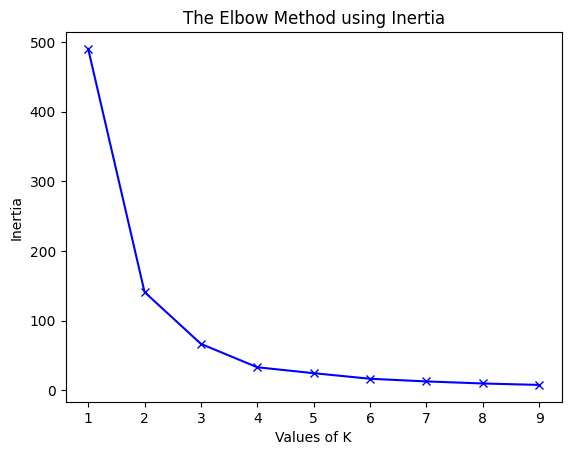

In [ ]:
# Plot the Elbow Method using Inertia to find the best number of clusters for our data
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In the graph we can see that the best cluster numbers are 3 or 4.



---



### 2.2. K-Means with 3 Clusters

In [ ]:
kmeansModel_3 = KMeans(n_clusters=3, n_init=10).fit(normalized_retail_df)

In [ ]:
# Labels for 3 clusters
labels_3 = kmeansModel_3.labels_
labels_3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)



---



### 2.3. K-Means with 4 Clusters

In [ ]:
# KMean model with 4 cluster
kmeanModel_4= KMeans(n_clusters=4, n_init=10).fit(normalized_retail_df)

In [ ]:
# Labels for 4 clusters
labels_4 = kmeanModel_4.labels_
labels_4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)



---



### 2.4. Dimension Reduction with Principal Component Analysis (PCA) - compare 3 and 4 clusters

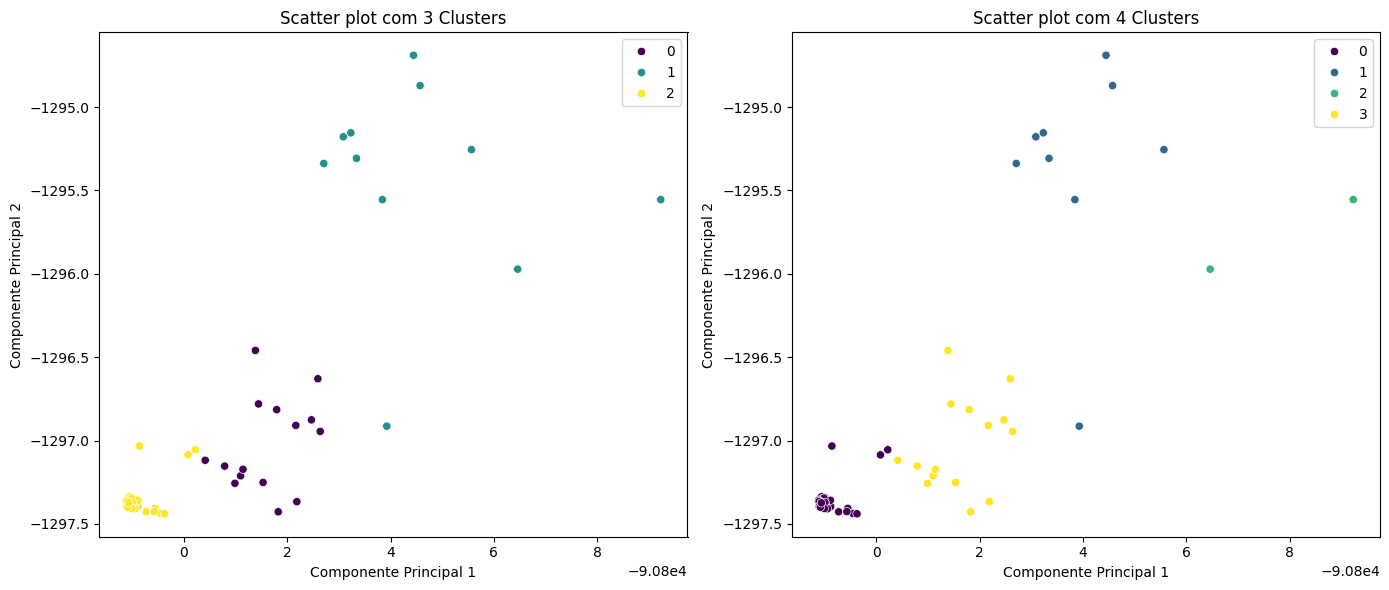

In [ ]:
from sklearn.decomposition import PCA

# Instantiate the PCA object with the desired number of components
pca = PCA(n_components=2)

# Apply PCA to our data
pca.fit(retail_complete_df_1)

# Transform the data into the space of principal components
kmeanModel_4= KMeans(n_clusters=4, n_init=10).fit(normalized_retail_df)
pca_data = pca.transform(normalized_retail_df)

# Scatter Plot with clusters - 3 and 4
plt.figure(figsize=(14, 6))

# Scatter plot 3 Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_3, palette='viridis', legend='full')
plt.title('Scatter plot com 3 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Scatter plot 4 Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_4, palette='viridis', legend='full')
plt.title('Scatter plot com 4 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.99576543, 0.00270904])

In [ ]:
pca.components_

array([[ 4.84462297e-01,  1.45311441e-01,  4.49343887e-01,
         5.72891720e-01,  1.03609667e-01,  1.65093753e-04,
         4.50922417e-01],
       [-7.35569848e-02, -2.67462772e-02, -1.58074751e-01,
         1.38328052e-01,  9.62661716e-01,  5.35398377e-04,
        -1.51769111e-01]])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)
# Both PC explain 99% of the variance. This match the goods results we can see in the plot

array([0.99576543, 0.99847447])



---



### 2.5. Finding influences of each features to the Clustering




### 2.5.1. 3 Clusters

In [ ]:
# Convert the 'normalized_retail_df' (numpy array) into a DataFrame
normalized_retail_df = pd.DataFrame(normalized_retail_df)

# Convert the cluster labels into a list
labels_3_list = labels_3.tolist()

# Add new column with Labels of the 3 clusters to the DataFrame
normalized_retail_df.insert(0, '3 Clusters', labels_3_list)

normalized_retail_df

,3 Clusters,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja
0,2,-0.556368,-0.532048,-0.558616,-0.550245,-0.616295,-0.931642,-0.553148
1,2,-0.475395,-0.456704,-0.493274,-0.438725,-0.581647,-0.678675,-0.487171
2,2,-0.421939,-0.387018,-0.418714,-0.427121,-0.587608,-0.628082,-0.427250
3,2,-0.393526,-0.255266,-0.377168,-0.424634,-0.569650,-0.729268,-0.380046
4,2,-0.481271,-0.398944,-0.463394,-0.515089,-0.582392,-0.729268,-0.471574
...,...,...,...,...,...,...,...,...
65,1,1.242848,1.401096,1.218552,1.287720,2.079373,1.395656,1.199364
66,1,1.189121,1.115194,1.123784,1.313371,2.197253,1.648624,1.139990
67,1,1.123935,1.148584,1.076735,1.213088,2.162307,1.648624,1.058161
68,1,2.294832,2.342639,2.348910,2.180663,2.477572,2.306339,2.346933


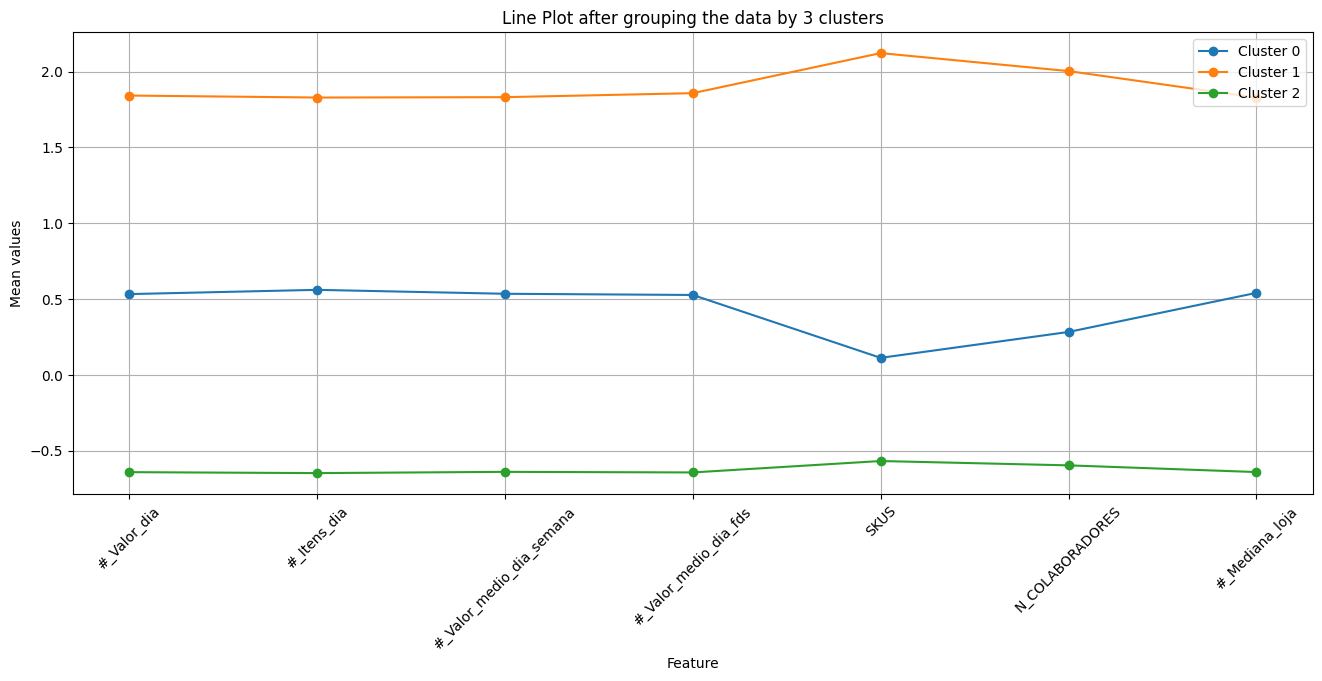

In [ ]:
# Group the data by cluster and calculate the mean of each group
cluster_means_3 = normalized_retaildf.groupby('3 Clusters').mean()

# Line Plot with the mean values of each feature after grouping the data by cluster
plt.figure(figsize=(16, 6))
for cluster in cluster_means_3.index:
    plt.plot(cluster_means_3.columns, cluster_means_3.loc[cluster], marker='o', label=f'Cluster {cluster}')

plt.title('Line Plot after grouping the data by 3 clusters')
plt.xlabel('Feature')
plt.ylabel('Mean values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
normalized_retail_df.drop('3 Clusters', axis=1, inplace=True)

### 2.5.2. 4 Clusters

In [ ]:
# Convert the cluster labels into a list.
labels_4_list = labels_4.tolist()

# Add new column with Labels of the 4 clusters to the DataFrame
normalized_retail_df.insert(0, '4 Clusters', labels_4_list)

normalized_retail_df

,4 Clusters,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja
0,0,-0.556368,-0.532048,-0.558616,-0.550245,-0.616295,-0.931642,-0.553148
1,0,-0.475395,-0.456704,-0.493274,-0.438725,-0.581647,-0.678675,-0.487171
2,0,-0.421939,-0.387018,-0.418714,-0.427121,-0.587608,-0.628082,-0.427250
3,0,-0.393526,-0.255266,-0.377168,-0.424634,-0.569650,-0.729268,-0.380046
4,0,-0.481271,-0.398944,-0.463394,-0.515089,-0.582392,-0.729268,-0.471574
...,...,...,...,...,...,...,...,...
65,1,1.242848,1.401096,1.218552,1.287720,2.079373,1.395656,1.199364
66,1,1.189121,1.115194,1.123784,1.313371,2.197253,1.648624,1.139990
67,1,1.123935,1.148584,1.076735,1.213088,2.162307,1.648624,1.058161
68,1,2.294832,2.342639,2.348910,2.180663,2.477572,2.306339,2.346933


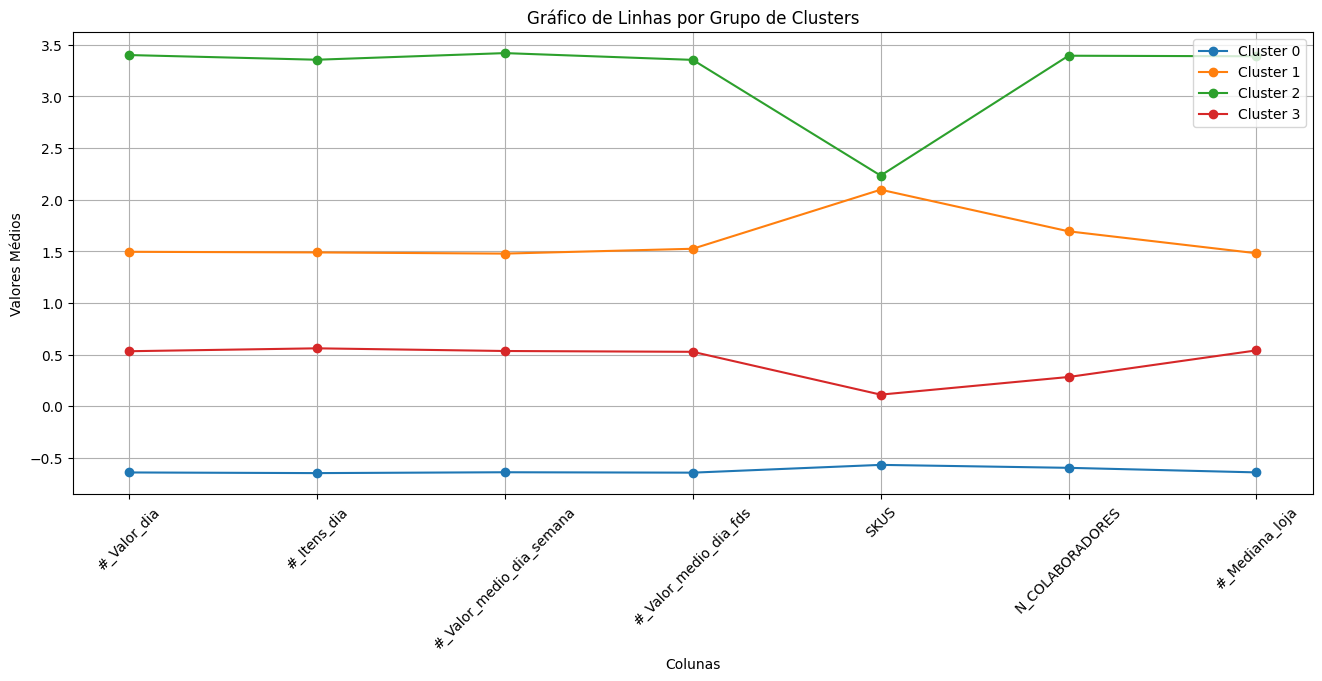

In [ ]:
# Group the data by cluster and calculate the mean of each group
cluster_means_4 = normalized_retail_df.groupby('4 Clusters').mean()

# Line Plot with the mean values of each feature after grouping the data by cluster
plt.figure(figsize=(16, 6))
for cluster in cluster_means_4.index:
    plt.plot(cluster_means_4.columns, cluster_means_4.loc[cluster], marker='o', label=f'Cluster {cluster}')

plt.title('Gráfico de Linhas por Grupo de Clusters')
plt.xlabel('Colunas')
plt.ylabel('Valores Médios')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
normalized_retail_df.drop('4 Clusters', axis=1, inplace=True)



---



### 2.6. Data with 3 Clusters Labels

In [ ]:
# Add new column with Labels of the 3 clusters to original data
retail_complete_df.insert(0, '3 Clusters', labels_3_list)

retail_complete_df.head()

,3 Clusters,LOJA,Tipo Loja,#_Valor_dia,#_Itens_dia,SKUS,#_%_Valor_dias_semana,#_%_Valor_dias_fds,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,...,#_Media_pond_quin,#_Media_pond_sex,#_Media_pond_sab,#_Media_pond_dom,%_Caixas_tradicionais,%_Self_Check_out,PRODUTIVIDADE/HORA,N_COLABORADORES,Nº Horas Aberto,#_Mediana_loja
0,2,Caldas da Rainha,1. Loja Mini,12620.49,5767.5,2760,0.3218,0.6782,11958.99,14286.06,...,-0.0280,-0.0184,-0.0209,-0.0241,0.5000,0.5000,136,7,13.0,12118.56
1,2,Campera,1. Loja Mini,17178.43,7043.1,3225,0.3597,0.6403,15373.27,21718.96,...,-0.0279,-0.0305,-0.0196,-0.0228,0.7333,0.2667,200,12,16.0,15576.91
2,2,Canidelo,1. Loja Mini,20187.40,8222.9,3145,0.3174,0.6826,19269.17,22492.35,...,-0.0319,-0.0266,-0.0207,-0.0220,1.0000,0.0000,147,13,14.0,18717.85
3,2,Faro Mercado,1. Loja Mini,21786.80,10453.5,3386,0.2961,0.7039,21440.04,22658.11,...,-0.0209,-0.0063,-0.0333,-0.0221,0.2727,0.7273,222,11,13.8,21192.23
4,2,Guarda,1. Loja Mini,16847.69,8021.0,3215,0.2808,0.7192,16934.55,16629.22,...,-0.0322,-0.0190,-0.0254,-0.0205,0.8333,0.1667,186,11,14.5,16394.50


In [ ]:
# First Cluster (0)
retail_complete_df[retail_complete_df['3 Clusters'] == 0][['3 Clusters', 'LOJA']]

,3 Clusters,LOJA
42,0,Castelo Branco
43,0,Coimbra
44,0,Coina
46,0,Évora
47,0,Famalicão
48,0,Figueira da Foz
49,0,Guimarães
50,0,Lagoa
51,0,Olhão
52,0,Paço de Arcos


In [ ]:
# Second Cluster (1)
retail_complete_df[retail_complete_df['3 Clusters'] == 1][['3 Clusters', 'LOJA']]

,3 Clusters,LOJA
41,1,Alverca
60,1,Alfragide
61,1,Almada Fórum
62,1,Aveiro
63,1,Faro
64,1,Gaia
65,1,Gondomar
66,1,Maia
67,1,Matosinhos
68,1,Setúbal


In [ ]:
# Third Cluster (2)
retail_complete_df[retail_complete_df['3 Clusters'] == 2][['3 Clusters', 'LOJA']]

,3 Clusters,LOJA
0,2,Caldas da Rainha
1,2,Campera
2,2,Canidelo
3,2,Faro Mercado
4,2,Guarda
5,2,S - Ajuda
6,2,S - Algés
7,2,S - Almirante Reis II
8,2,S - Amadora
9,2,S - Av. D. João II


In [ ]:
retail_complete_df.drop('3 Clusters', axis=1, inplace=True)



---



### 2.7. Data with 4 Clusters Labels

In [ ]:
# Add new column with Labels of the 4 clusters to original data
retail_complete_df.insert(0, '4 Clusters', labels_4_list)

In [ ]:
retail_complete_df.head()

,4 Clusters,LOJA,Tipo Loja,#_Valor_dia,#_Itens_dia,SKUS,#_%_Valor_dias_semana,#_%_Valor_dias_fds,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,...,#_Media_pond_quin,#_Media_pond_sex,#_Media_pond_sab,#_Media_pond_dom,%_Caixas_tradicionais,%_Self_Check_out,PRODUTIVIDADE/HORA,N_COLABORADORES,Nº Horas Aberto,#_Mediana_loja
0,0,Caldas da Rainha,1. Loja Mini,12620.49,5767.5,2760,0.3218,0.6782,11958.99,14286.06,...,-0.0280,-0.0184,-0.0209,-0.0241,0.5000,0.5000,136,7,13.0,12118.56
1,0,Campera,1. Loja Mini,17178.43,7043.1,3225,0.3597,0.6403,15373.27,21718.96,...,-0.0279,-0.0305,-0.0196,-0.0228,0.7333,0.2667,200,12,16.0,15576.91
2,0,Canidelo,1. Loja Mini,20187.40,8222.9,3145,0.3174,0.6826,19269.17,22492.35,...,-0.0319,-0.0266,-0.0207,-0.0220,1.0000,0.0000,147,13,14.0,18717.85
3,0,Faro Mercado,1. Loja Mini,21786.80,10453.5,3386,0.2961,0.7039,21440.04,22658.11,...,-0.0209,-0.0063,-0.0333,-0.0221,0.2727,0.7273,222,11,13.8,21192.23
4,0,Guarda,1. Loja Mini,16847.69,8021.0,3215,0.2808,0.7192,16934.55,16629.22,...,-0.0322,-0.0190,-0.0254,-0.0205,0.8333,0.1667,186,11,14.5,16394.50


In [ ]:
# First Cluster (0)
retail_complete_df[retail_complete_df['4 Clusters'] == 0][['4 Clusters', 'LOJA']]

,4 Clusters,LOJA
0,0,Caldas da Rainha
1,0,Campera
2,0,Canidelo
3,0,Faro Mercado
4,0,Guarda
5,0,S - Ajuda
6,0,S - Algés
7,0,S - Almirante Reis II
8,0,S - Amadora
9,0,S - Av. D. João II


In [ ]:
# Second Cluster (1)
retail_complete_df[retail_complete_df['4 Clusters'] == 1][['4 Clusters', 'LOJA']]

,4 Clusters,LOJA
41,1,Alverca
62,1,Aveiro
63,1,Faro
64,1,Gaia
65,1,Gondomar
66,1,Maia
67,1,Matosinhos
68,1,Setúbal
69,1,Sintra


In [ ]:
# Third Cluster (2)
retail_complete_df[retail_complete_df['4 Clusters'] == 2][['4 Clusters', 'LOJA']]

,4 Clusters,LOJA
60,2,Alfragide
61,2,Almada Fórum


In [ ]:
# Fourth Cluster (2)
retail_complete_df[retail_complete_df['4 Clusters'] == 3][['4 Clusters', 'LOJA']]

,4 Clusters,LOJA
42,3,Castelo Branco
43,3,Coimbra
44,3,Coina
46,3,Évora
47,3,Famalicão
48,3,Figueira da Foz
49,3,Guimarães
50,3,Lagoa
51,3,Olhão
52,3,Paço de Arcos


In [ ]:
retail_complete_df.drop('4 Clusters', axis=1, inplace=True)



---





---



## 3. Clustering with Spetral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import networkx as nx

### 3.1. Construction of the Binary Similarity Matrix

In [ ]:
# Calculate the distance matrix between all pairs of data points in the normalized_retaildf matrix, using the Euclidean metric.
W = pairwise_distances(normalized_retail_df, metric="euclidean")

# Map the values in the distance matrix
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)

# Apply the lambda function to all elements of the distance matrix W
W = np.vectorize(vectorizer)(W)

print(W)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 0 0]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [ ]:
# Draw a network graph
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    np.random.seed(40)

[[0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 1 1 0 1 1]
 [0 1 0 1 0 1 1 0 0 1]
 [0 1 1 0 1 0 1 1 1 0]
 [0 0 0 1 0 1 0 1 1 1]
 [1 1 1 0 1 0 0 0 1 1]
 [0 1 1 1 0 0 0 1 0 1]
 [0 0 0 1 1 0 1 0 1 0]
 [0 1 0 1 1 1 0 1 0 0]
 [0 1 1 0 1 1 1 0 0 0]]


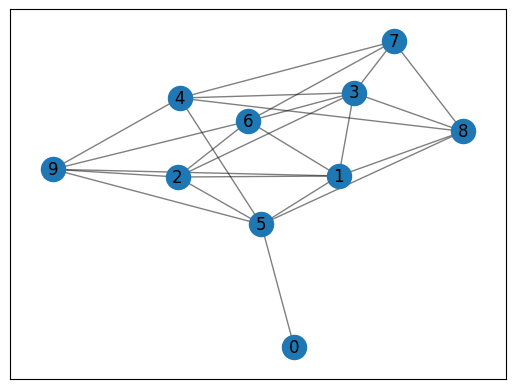

In [ ]:
# Create Adjacency Matrix - graph generated by the Erdős-Rényi model based on the similarity matrix (W)
G = nx.random_graphs.erdos_renyi_graph(10, 0.5, seed=20)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [ ]:
# Degree Matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('Degree Matrix:')
print(D)

# Laplacian matrix
L = D - W
print('\nLaplacian Matrix:')
print(L)

Degree Matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]

Laplacian Matrix:
[[ 1  0  0  0  0 -1  0  0  0  0]
 [ 0  6 -1 -1  0 -1 -1  0 -1 -1]
 [ 0 -1  5 -1  0 -1 -1  0  0 -1]
 [ 0 -1 -1  6 -1  0 -1 -1 -1  0]
 [ 0  0  0 -1  5 -1  0 -1 -1 -1]
 [-1 -1 -1  0 -1  6  0  0 -1 -1]
 [ 0 -1 -1 -1  0  0  5 -1  0 -1]
 [ 0  0  0 -1 -1  0 -1  4 -1  0]
 [ 0 -1  0 -1 -1 -1  0 -1  5  0]
 [ 0 -1 -1  0 -1 -1 -1  0  0  5]]


In [ ]:
e, v = np.linalg.eig(L)

# Calculate eigenvalues
print('Eigenvalues:')
print(e)

# Calculate eigenvectors
print('\nEigenvectors:')
print(v)

Eigenvalues:
[-3.33066907e-16  9.16049634e-01  3.10918689e+00  4.14651849e+00
  8.07940935e+00  7.32248017e+00  7.14335001e+00  6.24319520e+00
  5.03981026e+00  6.00000000e+00]

Eigenvectors:
[[ 3.16227766e-01 -9.28410667e-01 -6.48490547e-02 -1.22862041e-01
  -6.89470866e-02 -6.15709897e-02 -7.39120797e-02  6.84604710e-02
   7.65719584e-03 -1.17111538e-16]
 [ 3.16227766e-01  1.06334649e-01  2.40845036e-01  3.28229912e-02
  -4.33777829e-01  5.71319725e-01 -3.14801383e-01  4.32515966e-02
  -3.37741349e-01  3.16227766e-01]
 [ 3.16227766e-01  1.05131265e-01  4.35956698e-01 -1.35919326e-01
  -2.59651305e-01 -2.78237446e-01  3.30147796e-02 -3.22516562e-01
  -1.74566107e-01 -6.32455532e-01]
 [ 3.16227766e-01  1.49380613e-01 -1.16474768e-01 -1.53663569e-01
   5.65735911e-01  7.60686702e-02 -3.45680172e-01  4.73709343e-01
  -2.66021957e-01 -3.16227766e-01]
 [ 3.16227766e-01  1.10720116e-01 -2.74616315e-01  4.22157231e-01
  -3.72398713e-01  1.09054352e-01  1.83375010e-01  4.11815630e-01
   4.246

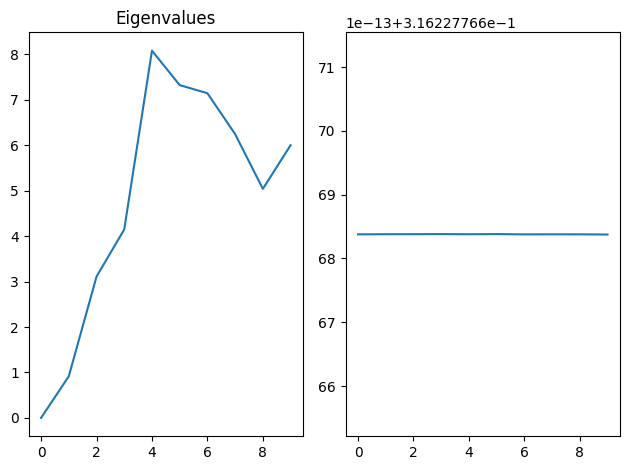

In [ ]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('Eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In the graph we can see a inflection point or a sharp change in the magnitude of the eigenvalues when the number of clusters is 4. So we will assume that is the best number of clusters.

However, it's worth noting that the assumption that the number of clusters is the best at the point of inflection or sharp change in the magnitude of eigenvalues depends on the context and the specific dataset being analyzed. It's a common heuristic, but it's not always guaranteed to be the best choice. Therefore, it's essential to validate the chosen number of clusters using other methods or domain knowledge whenever possible.



---



### 3.2. Spectral Clustering with 4 clusters

In [ ]:
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)
sc_clustering = sc.fit(normalized_retail_df)

In [ ]:
# Labels of 4 Clusters with Spectral Clustering
sc_clustering.labels_

array([3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

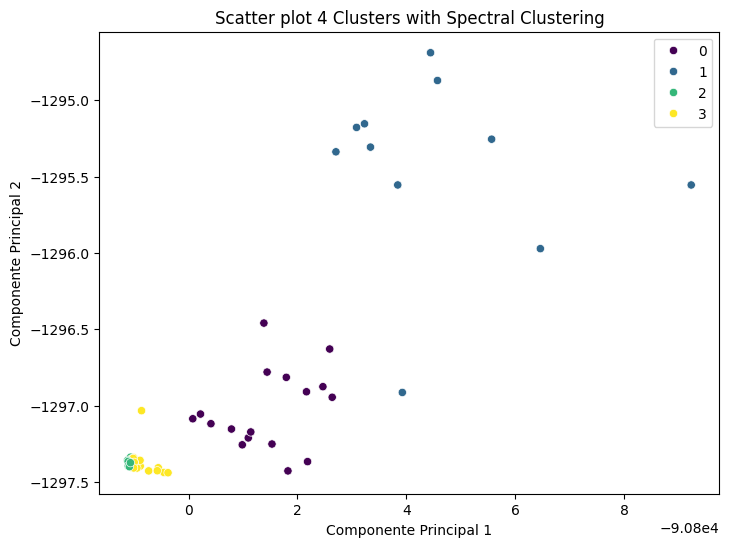

In [ ]:
# Scatter Plot 4 Clusters with Spectral Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=sc_clustering.labels_, palette='viridis', legend='full')
plt.title('Scatter plot 4 Clusters with Spectral Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()



---





---



## 4. Clustering with DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss

### 4.1. Finding Best Combinations with Silhouette score

In [ ]:
epsilons = np.linspace(0.01,1, num=100)
epsilons

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
min_samples = np.arange(2,20,step=1)
min_samples

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [ ]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
#combinations
N = len (combinations)
N

1800

In [ ]:
def get_scores_and_labels(combinations,normalized_retail_df):
  scores = []
  all_labels_list = []
  N = len (combinations)

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_model = DBSCAN(eps=eps, min_samples=num_samples).fit(normalized_retail_df)
    labels = dbscan_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters= num_clusters - 1

    if(num_clusters < 3) or (num_clusters > 4):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(normalized_retail_df,labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples' : best_parameters[1],
          'best_labels' : best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, normalized_retail_df)

Combination (0.01, 2) on iteration 1 of 1800 has 0 clusters. Moving on
Combination (0.01, 3) on iteration 2 of 1800 has 0 clusters. Moving on
Combination (0.01, 4) on iteration 3 of 1800 has 0 clusters. Moving on
Combination (0.01, 5) on iteration 4 of 1800 has 0 clusters. Moving on
Combination (0.01, 6) on iteration 5 of 1800 has 0 clusters. Moving on
Combination (0.01, 7) on iteration 6 of 1800 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 7 of 1800 has 0 clusters. Moving on
Combination (0.01, 9) on iteration 8 of 1800 has 0 clusters. Moving on
Combination (0.01, 10) on iteration 9 of 1800 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 10 of 1800 has 0 clusters. Moving on
Combination (0.01, 12) on iteration 11 of 1800 has 0 clusters. Moving on
Combination (0.01, 13) on iteration 12 of 1800 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 13 of 1800 has 0 clusters. Moving on
Combination (0.01, 15) on iteration 14 of 1800 has 0 clusters. Movin



---



### 4.2. DBSCAN with 4 Clusters

In [ ]:
best_dict

{'best_epsilon': 0.72,
 'best_min_samples': 5,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  0,  1,  1,  1,  1,  1, -1, -1,  2, -1,  2,  2,  2,  2,
        -1, -1]),
 'best_score': 0.6891438107767153}

In [ ]:
retail_complete_df['cluster'] = best_dict['best_labels']
retail_complete_df['cluster'].value_counts()

 0    43
 1    16
-1     6
 2     5
Name: cluster, dtype: int64

In [ ]:
DBSCAN_labels = best_dict['best_labels']
DBSCAN_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  1,  1, -1, -1,  2, -1,  2,  2,  2,  2,
       -1, -1])

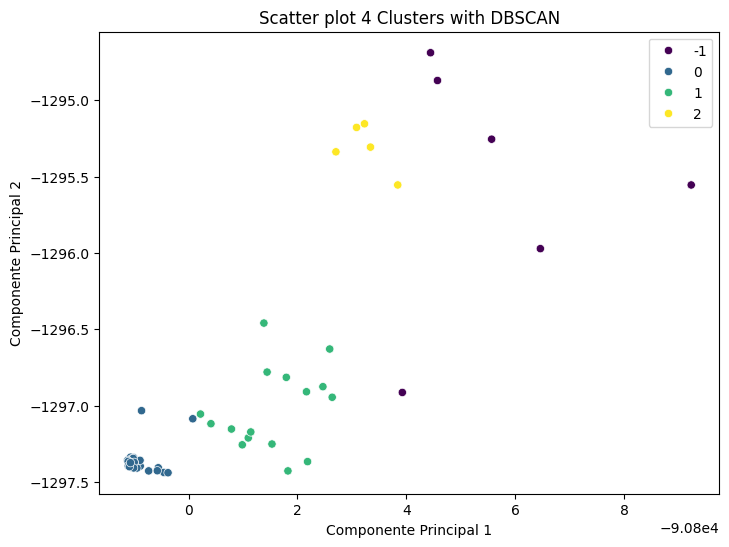

In [ ]:
# Scatter Plot 4 Clusters with DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue= DBSCAN_labels, palette='viridis', legend='full')
plt.title('Scatter plot 4 Clusters with DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
retail_complete_df.drop('cluster', axis=1, inplace=True)



---





---



## 5. Compare k-Means and Spectral Clustering with 4 Clusters

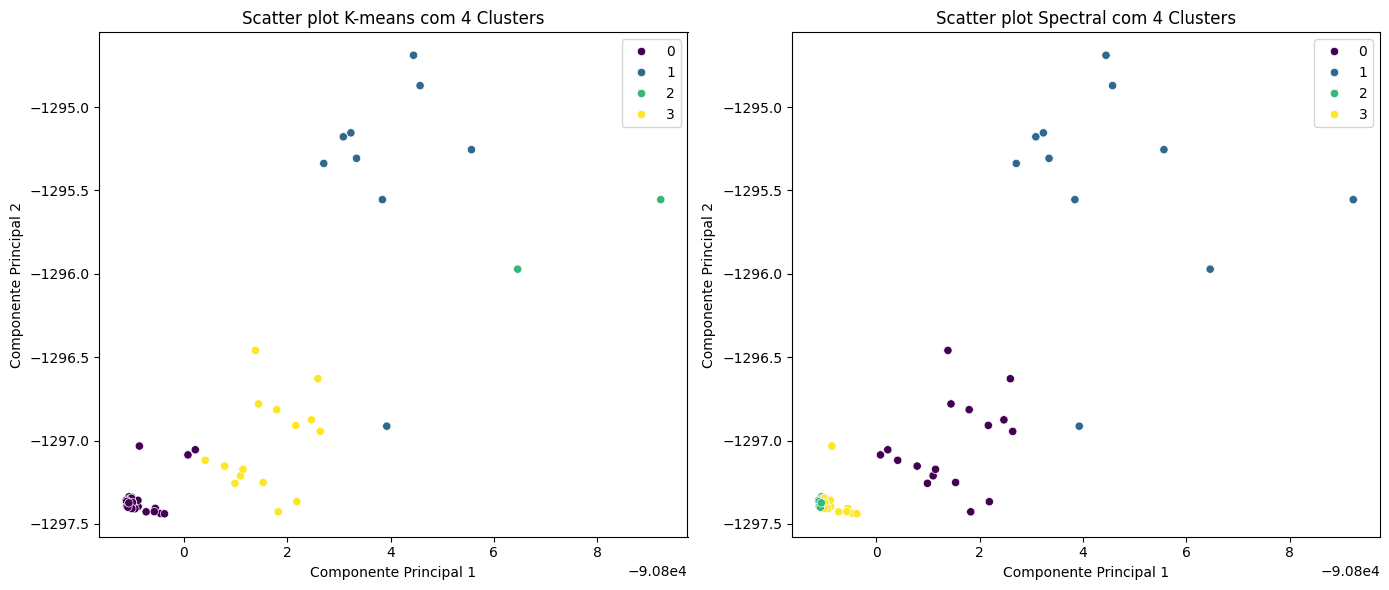

In [ ]:
# Compare Scatter Plot with K-Means and Spectral Clustering
plt.figure(figsize=(14, 6))

# Scatter plot with K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_4_list, palette='viridis', legend='full')
plt.title('Scatter plot K-means com 4 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Scatter plot with Spectral Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=sc_clustering.labels_, palette='viridis', legend='full')
plt.title('Scatter plot Spectral com 4 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()



---





---



## 6. Export Final Results of Clustering - K-Means

In [ ]:
retail_complete_df_1.shape

(70, 7)

In [ ]:
# Add new column with Labels of the 4 clusters to original data
retail_complete_df_1.insert(7, '4 Clusters', labels_4_list)

In [ ]:
#Add 'LOJA' column
retail_complete_df_1.loc[:, 'LOJA'] = retail_complete_df['LOJA']

<ipython-input-195-affd8615688a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlantic_complete_df_1.loc[:, 'LOJA'] = tlantic_complete_df['LOJA']


In [ ]:
retail_complete_df_1.to_excel("Cluster_final_results.xlsx", index=False)

In [ ]:
retail_complete_df_1

,#_Valor_dia,#_Itens_dia,#_Valor_medio_dia_semana,#_Valor_medio_dia_fds,SKUS,N_COLABORADORES,#_Mediana_loja,4 Clusters,LOJA
0,12620.49,5767.5,11958.99,14286.06,2760,7,12118.56,0,Caldas da Rainha
1,17178.43,7043.1,15373.27,21718.96,3225,12,15576.91,0,Campera
2,20187.40,8222.9,19269.17,22492.35,3145,13,18717.85,0,Canidelo
3,21786.80,10453.5,21440.04,22658.11,3386,11,21192.23,0,Faro Mercado
4,16847.69,8021.0,16934.55,16629.22,3215,11,16394.50,0,Guarda
...,...,...,...,...,...,...,...,...,...
65,113897.08,38496.2,104819.79,136787.65,38937,53,103981.80,1,Gondomar
66,110872.84,33655.8,99867.97,138497.33,40519,58,100869.55,1,Maia
67,107203.53,34221.1,97409.54,131813.43,40050,58,96580.23,1,Matosinhos
68,173112.48,54436.8,163883.37,196302.97,44281,71,164135.18,1,Setúbal
